### Code References


VADER implementation: https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e#:~:text=Sentiment%20analysis%20is%20a%20popular,trained%20model%20for%20sentiment%20analysis.

TextBlob implementation: https://betterprogramming.pub/a-step-by-step-guide-to-using-textblob-for-nlp-with-python-157a7365a17b

FinBERT implementation: https://huggingface.co/ProsusAI/finbert




### Comparing different Natural Language Processing techniques.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("../../data/financial_news/stock_news_api/all_tickers.csv")
df.shape

(26615, 7)

### Text preprocessing

First we will perform text preprocessing using the following steps:

1. Converting the text to lowercase to avoid duplicates.
2. Remove punctation as it wouldn't make any difference in the analysis.
3. Tokenization: Converting the article text into an array of words/tokens.
4. Remove the stopwords that wouldn't make a difference to the sentiment analysis e.g. is, be, was, etc.
5. Lemmatization or Stemming: Converting each word to its root word e.g. running->run, better->good.
6. Add new columns to the dataset with the processed text 

The sentiment analysis functions get_vader_label, get_textblob_label, and get_finbert_label from the SentimentAnalysis module are applied to the preprocessed text column. These functions assign sentiment labels using VADER, TextBlob, and FinBERT. The resulting sentiment labels are stored in new columns.

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../')
from utils.SentimentAnalysis import preprocess_text, get_vader_label, get_textblob_label, get_finbert_label

# Apply text preprocessing functions to the text column (function in utils)
df["processed_text"] = df["text"].apply(preprocess_text)
# Apply sentiment analysis functions to obtain sentiment labels using the different techniques
df["VADER_label"] = df["processed_text"].apply(get_vader_label)
df['TextBlob_label'] = df['processed_text'].apply(get_textblob_label)
df["finbert_label"] = df["processed_text"].apply(get_finbert_label)

c:\Users\omare\.conda\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The aggregate_labels function is defined to aggregate the sentiment labels obtained from different techniques and determine the final sentiment label based on the majority vote.


In [3]:
from collections import Counter

model_columns = ['VADER_label', 'TextBlob_label', 'finbert_label']

# Aggregate the sentiment labels obtained from different techniques
# get the final sentiment label based on the majority vode
def aggregate_labels(row):
    model_labels = [row[model] for model in model_columns]
    label_counts = Counter(model_labels)
    final_label = label_counts.most_common(1)[0][0]
    return final_label

df['final_label'] = df.apply(aggregate_labels, axis=1)
df[['date', 'final_label']].head(10)


,date,final_label
0,"Fri, 30 Dec 2022 19:51:00 -0500",Neutral
1,"Fri, 30 Dec 2022 14:52:52 -0500",Neutral
2,"Fri, 30 Dec 2022 12:31:20 -0500",Neutral
3,"Fri, 30 Dec 2022 12:29:44 -0500",Neutral
4,"Fri, 30 Dec 2022 12:24:22 -0500",Neutral
5,"Fri, 30 Dec 2022 05:06:00 -0500",Neutral
6,"Thu, 29 Dec 2022 19:33:46 -0500",Negative
7,"Thu, 29 Dec 2022 17:04:47 -0500",Neutral
8,"Thu, 29 Dec 2022 15:49:39 -0500",Negative
9,"Thu, 29 Dec 2022 13:49:00 -0500",Positive


Let's visualize and evaluate the results of sentiment analysis obtained from different techniques applied to a DataFrame containing financial news data.

1. plot_sentiment_comparison Function: This function plots the comparison between sentiment labels obtained from different techniques and the aggregated labels.
2. evaluate_sentiment Function: This function evaluates the performance of sentiment analysis techniques by comparing their predicted labels with the aggregated labels. It computes metrics such as accuracy, confusion matrix, and classification report and prints them to the console.



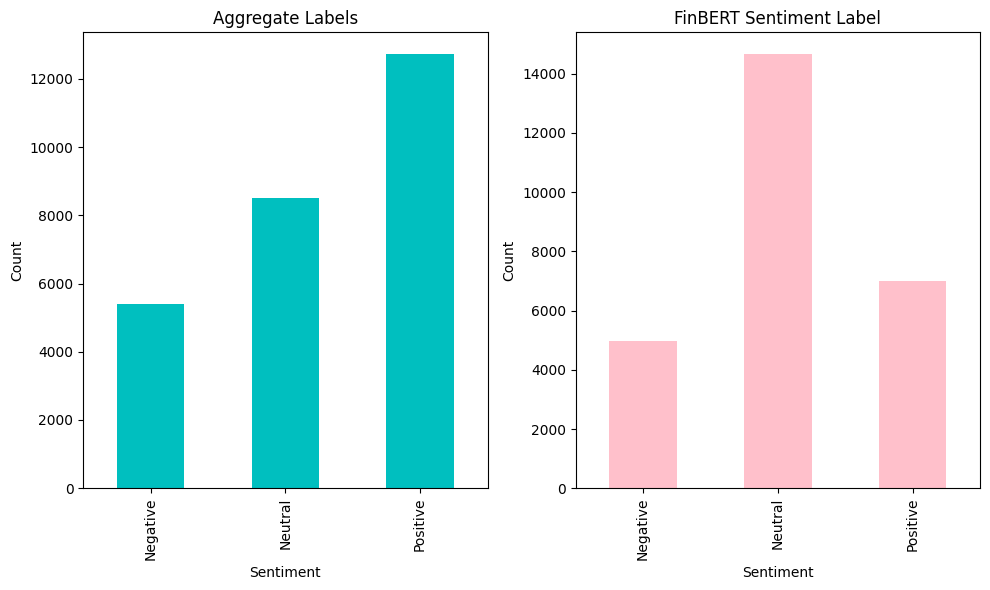

Accuracy: 0.63
Confusion Matrix:
[[3083 1903  400]
 [ 519 7524  459]
 [1360 5240 6127]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.57      0.60      5386
     Neutral       0.51      0.88      0.65      8502
    Positive       0.88      0.48      0.62     12727

    accuracy                           0.63     26615
   macro avg       0.67      0.65      0.62     26615
weighted avg       0.71      0.63      0.63     26615



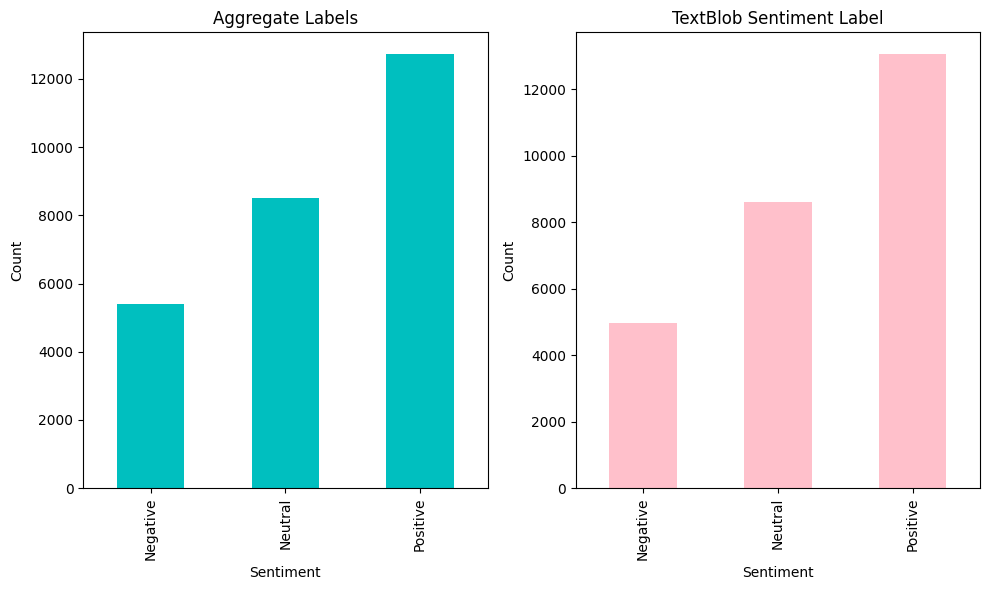

Accuracy: 0.69
Confusion Matrix:
[[2706  889 1791]
 [ 689 6083 1730]
 [1563 1629 9535]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.55      0.50      0.52      5386
     Neutral       0.71      0.72      0.71      8502
    Positive       0.73      0.75      0.74     12727

    accuracy                           0.69     26615
   macro avg       0.66      0.66      0.66     26615
weighted avg       0.69      0.69      0.69     26615



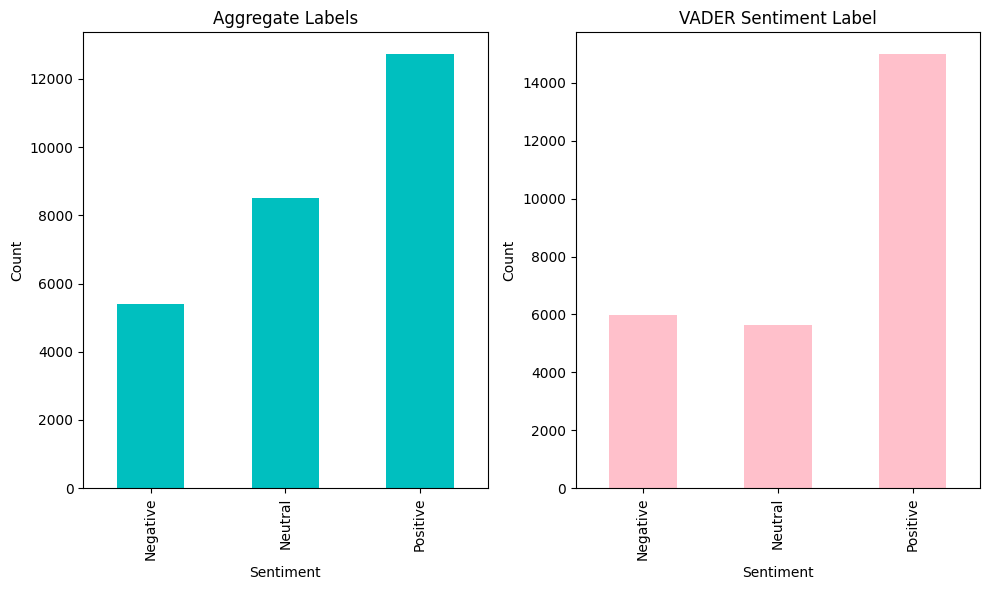

Accuracy: 0.84
Confusion Matrix:
[[ 4904   126   356]
 [  799  5216  2487]
 [  288   290 12149]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.91      0.86      5386
     Neutral       0.93      0.61      0.74      8502
    Positive       0.81      0.95      0.88     12727

    accuracy                           0.84     26615
   macro avg       0.85      0.83      0.83     26615
weighted avg       0.85      0.84      0.83     26615



In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def plot_sentiment_comparison(df, label, title):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    df["final_label"].value_counts().sort_index().plot(kind="bar", color="c")
    plt.title("Aggregate Labels")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    df[label].value_counts().sort_index().plot(kind="bar", color="pink")
    plt.title(title)
    plt.xlabel("Sentiment")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

def evaluate_sentiment(df, true_label, predicted_label):
    # Evaluate models' perofmance by calculating accuracy, confusion matrix, and classification report
    accuracy = accuracy_score(df[true_label], df[predicted_label])
    print(f'Accuracy: {accuracy:.2f}')

    conf_matrix = confusion_matrix(df[true_label], df[predicted_label])
    print('Confusion Matrix:')
    print(conf_matrix)

    class_report = classification_report(df[true_label], df[predicted_label])
    print('Classification Report:')
    print(class_report)

# Plot FinBERT labels vs. aggregated labels
plot_sentiment_comparison(df, "finbert_label","FinBERT Sentiment Label")
evaluate_sentiment(df, 'final_label', 'finbert_label')

# Plot TextBlob labels vs. aggregated labels
plot_sentiment_comparison(df, "TextBlob_label", "TextBlob Sentiment Label")
evaluate_sentiment(df, 'final_label', 'TextBlob_label')

# Plot VADER labels vs. aggregated labels
plot_sentiment_comparison(df, "VADER_label", "VADER Sentiment Label")
evaluate_sentiment(df, 'final_label', 'VADER_label')


In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this number as needed

# Define the features (processed_text) and target (sentiment) columns
X = df['processed_text']
y = df['final_label']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define lists to store evaluation metrics for each fold
vader_accuracies = []
textblob_accuracies = []
finbert_accuracies = []

vader_precisions = []
vader_recalls = []
vader_f1_scores = []

textblob_precisions = []
textblob_recalls = []
textblob_f1_scores = []

finbert_precisions = []
finbert_recalls = []
finbert_f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train VADER model
    vader_predicted_labels = X_test.apply(get_vader_label)
    
    # Calculate metrics for VADER model and append to the lists
    vader_accuracies.append(accuracy_score(y_test, vader_predicted_labels))
    vader_precisions.append(precision_score(y_test, vader_predicted_labels, average='weighted'))
    vader_recalls.append(recall_score(y_test, vader_predicted_labels, average='weighted'))
    vader_f1_scores.append(f1_score(y_test, vader_predicted_labels, average='weighted'))
    
    # Train TextBlob model
    textblob_predicted_labels = X_test.apply(get_textblob_label)
    
    # Calculate metrics for TextBlob model and append to the lists
    textblob_accuracies.append(accuracy_score(y_test, textblob_predicted_labels))
    textblob_precisions.append(precision_score(y_test, textblob_predicted_labels, average='weighted'))
    textblob_recalls.append(recall_score(y_test, textblob_predicted_labels, average='weighted'))
    textblob_f1_scores.append(f1_score(y_test, textblob_predicted_labels, average='weighted'))
    
    # Train FinBERT model
    finbert_predicted_labels = X_test.apply(get_finbert_label)
    
    # Calculate metrics for FinBERT model and append to the lists
    finbert_accuracies.append(accuracy_score(y_test, finbert_predicted_labels))
    finbert_precisions.append(precision_score(y_test, finbert_predicted_labels, average='weighted'))
    finbert_recalls.append(recall_score(y_test, finbert_predicted_labels, average='weighted'))
    finbert_f1_scores.append(f1_score(y_test, finbert_predicted_labels, average='weighted'))

# Calculate mean and standard deviation across all folds for each model
mean_vader_accuracy = np.mean(vader_accuracies)
std_vader_accuracy = np.std(vader_accuracies)
mean_vader_precision = np.mean(vader_precisions)
mean_vader_recall = np.mean(vader_recalls)
mean_vader_f1 = np.mean(vader_f1_scores)

mean_textblob_accuracy = np.mean(textblob_accuracies)
std_textblob_accuracy = np.std(textblob_accuracies)
mean_textblob_precision = np.mean(textblob_precisions)
mean_textblob_recall = np.mean(textblob_recalls)
mean_textblob_f1 = np.mean(textblob_f1_scores)

mean_finbert_accuracy = np.mean(finbert_accuracies)
std_finbert_accuracy = np.std(finbert_accuracies)
mean_finbert_precision = np.mean(finbert_precisions)
mean_finbert_recall = np.mean(finbert_recalls)
mean_finbert_f1 = np.mean(finbert_f1_scores)

# Calculate standard deviation for precision, recall, and F1-score for each model
std_vader_precision = np.std(vader_precisions)
std_vader_recall = np.std(vader_recalls)
std_vader_f1 = np.std(vader_f1_scores)

std_textblob_precision = np.std(textblob_precisions)
std_textblob_recall = np.std(textblob_recalls)
std_textblob_f1 = np.std(textblob_f1_scores)

std_finbert_precision = np.std(finbert_precisions)
std_finbert_recall = np.std(finbert_recalls)
std_finbert_f1 = np.std(finbert_f1_scores)

# Print mean metrics and standard deviation for each model
print("VADER model metrics:")
print("Accuracy:", mean_vader_accuracy, "+/-", std_vader_accuracy)
print("Precision:", mean_vader_precision, "+/-", std_vader_precision)
print("Recall:", mean_vader_recall, "+/-", std_vader_recall)
print("F1-score:", mean_vader_f1, "+/-", std_vader_f1)
print()

print("TextBlob model metrics:")
print("Accuracy:", mean_textblob_accuracy, "+/-", std_textblob_accuracy)
print("Precision:", mean_textblob_precision, "+/-", std_textblob_precision)
print("Recall:", mean_textblob_recall, "+/-", std_textblob_recall)
print("F1-score:", mean_textblob_f1, "+/-", std_textblob_f1)
print()

print("FinBERT model metrics:")
print("Accuracy:", mean_finbert_accuracy, "+/-", std_finbert_accuracy)
print("Precision:", mean_finbert_precision, "+/-", std_finbert_precision)
print("Recall:", mean_finbert_recall, "+/-", std_finbert_recall)
print("F1-score:", mean_finbert_f1, "+/-", std_finbert_f1)



VADER model metrics:
Accuracy: 0.8367086229569791 +/- 0.00473685547009973
Precision: 0.849054627194407 +/- 0.003570657048556288
Recall: 0.8367086229569791 +/- 0.00473685547009973
F1-score: 0.829391191168526 +/- 0.0051935432779032726

TextBlob model metrics:
Accuracy: 0.6884839376291565 +/- 0.002120118125818671
Precision: 0.6856166071282204 +/- 0.0028405632657341156
Recall: 0.6884839376291565 +/- 0.002120118125818671
F1-score: 0.6867542081544287 +/- 0.002577671751246153

FinBERT model metrics:
Accuracy: 0.6287431899304904 +/- 0.006584786820811246
Precision: 0.7089879499533216 +/- 0.005430158853750185
Recall: 0.6287431899304904 +/- 0.006584786820811246
F1-score: 0.6252700009002365 +/- 0.007091323257633382
